[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bsc-life/ml4br-ml-course/blob/main/nbs/day_3/03_shap_explainabilty.ipynb)

# SHAP values for explainability

In [ ]:
!pip install -q shap

In [12]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Load the dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
# 4. Evaluate model performance
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.3f}")

Test RMSE: 0.505


In [5]:
# 5. SHAP Explainability
# Use TreeExplainer because RandomForest is tree-based
explainer = shap.Explainer(model)

🧠 What Are SHAP Values?
- SHAP values measure how much each feature contributes to a specific prediction, compared to the average prediction (the baseline).

- For regression, SHAP values answer:
"How did each feature push this prediction up or down relative to the average prediction?"

In [6]:
# Compute SHAP values for test set
shap_values = explainer(X_test)

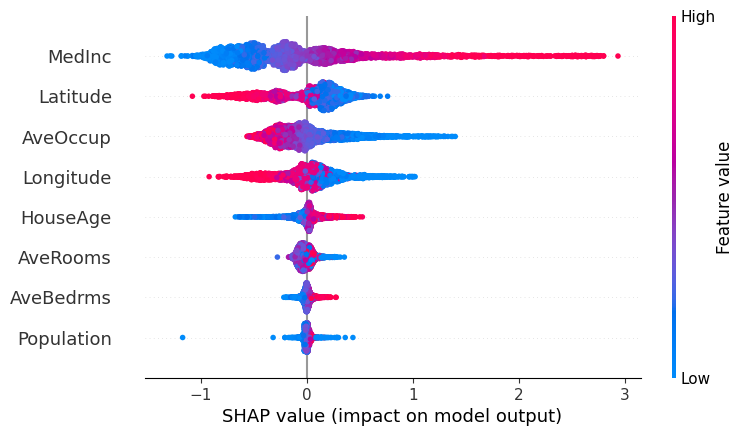

In [7]:
# 6. Global Explanation: Feature Importance
shap.plots.beeswarm(shap_values)

### Beeswarm Plot (Global explanation)
Use: `shap.plots.beeswarm(shap_values)`

- Summarizes SHAP values for all features across many instances.
- Each dot = one sample's SHAP value for that feature.
- Dot color = feature value (red = high, blue = low).
- Features are ranked by importance (i.e. mean |SHAP value|).

Interpretation:

>"Across the dataset, MedInc (median income) has the largest impact on predictions. Higher values (red) usually increase the predicted price (positive SHAP), lower values decrease it."

Prediction for sample: [0.5095]


/home/apopov/Projects/shap-demo/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


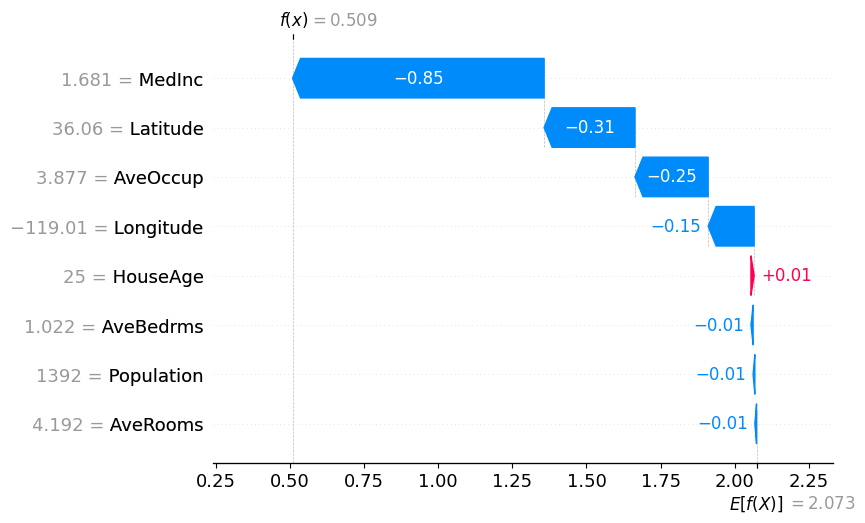

In [8]:
# 7. Local Explanation for a single sample
sample_idx = 0
print("Prediction for sample:", model.predict([X_test.iloc[sample_idx]]))
shap.plots.waterfall(shap_values[sample_idx])

### Waterfall Plot (Local explanation)
Use: `shap.plots.waterfall(shap_values[i])` (for a specific sample i)
- Shows how each feature contributed to a single prediction.
- The base value (leftmost bar) is the average model prediction across all training data.
- Positive SHAP values push the prediction higher than the base.
- Negative SHAP values push it lower.

Interpretation:

>"For this house, high MedInc (median income) subtracted 0.85 from the predictive price, Latitude subtracted 0.31, and AveOccup subtracted 0.25. The only positive contribution was from HouseAge +0.01"

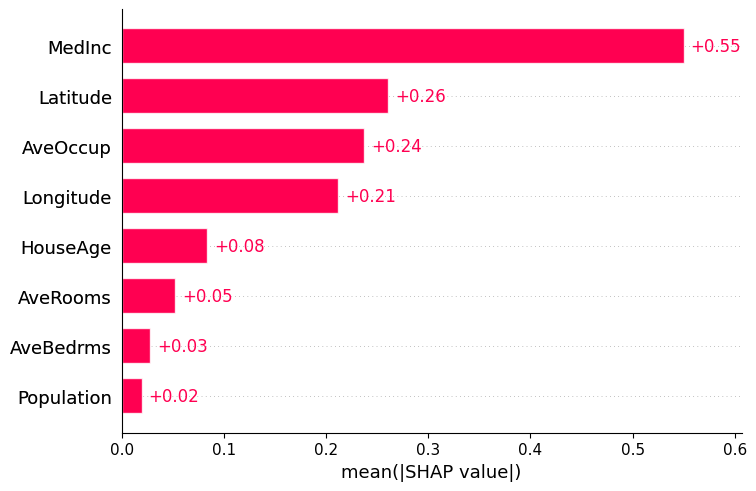

In [9]:
# Optional: summary bar plot
shap.plots.bar(shap_values)

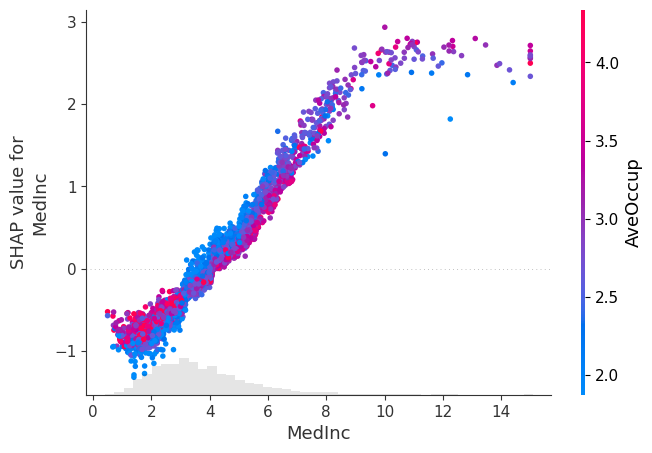

In [10]:
# Optional: dependence plot for a specific feature
shap.plots.scatter(shap_values[:, "MedInc"], color=shap_values)

### ✅ Rules of Thumb

| Observation                                      | What it means                                         |
|--------------------------------------------------|--------------------------------------------------------|
| SHAP value is **positive**                       | Feature **increases** prediction                      |
| SHAP value is **negative**                       | Feature **decreases** prediction                      |
| SHAP value is **near zero**                      | Feature had **little effect**                         |
| Wide SHAP value spread in beeswarm               | Feature is **important and varies**                   |
| High SHAP value for high feature value (red)     | Model responds **positively to high values** of that feature |
